In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [3]:
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [4]:
df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce', dayfirst=True)

Сгруппируйте данные по дате, посчитайте количество продаж

In [5]:
grouped_df =df.groupby('Дата')['Количество'].sum().reset_index()

In [6]:
grouped_df = grouped_df.sort_values('Дата')

Вывести несколько первых строк сгруппированных данных

In [7]:
print(grouped_df.head())

        Дата  Количество
0 2018-01-02        3770
1 2018-01-03        3848
2 2018-01-04        3786
3 2018-01-05        4221
4 2018-01-06        4736


Нарисуйте график продаж у `grouped_df`

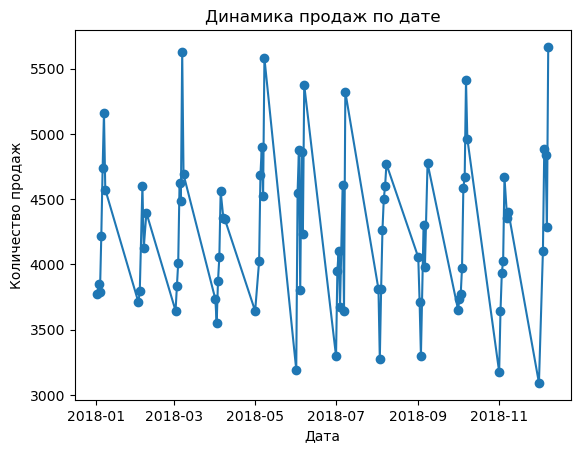

In [8]:
plt.plot(grouped_df['Дата'], grouped_df['Количество'], marker='o', linestyle='-')
plt.title('Динамика продаж по дате')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [13]:
График показывает нерегулярную динамику продаж с выраженными пиками и спадами,
что может указывать на сезонность, акции или неравномерный спрос по дням.

SyntaxError: invalid syntax (809966833.py, line 1)

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [9]:
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

outliers = df[df['Количество'] > upper_bound]

max_outlier = outliers[outliers['Количество'] == outliers['Количество'].max()]

print(max_outlier)

       Дата  Склад   Контрагент Номенклатура  Количество
218822  NaT      1  address_208    product_0         200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [10]:
filtered = df[
    (df['Склад'] == 3) &
    (df['Дата'].dt.month.isin([6, 7, 8])) &
    (df['Дата'].dt.weekday == 2)  ]

top_product = filtered.groupby('Номенклатура')['Количество'].sum().reset_index()

top_product = top_product.sort_values('Количество', ascending=False).head(1)

print(top_product)

  Номенклатура  Количество
1    product_1         479


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [19]:
df = pd.read_csv('погода.csv')

In [11]:
weather_df = pd.read_csv("погода.csv", encoding="utf-8")
grouped_df['Дата'] = pd.to_datetime(grouped_df['Дата']).dt.date
weather_df['Дата'] = pd.to_datetime(weather_df['Местное время в Астане']).dt.date

daily_temp = weather_df.groupby('Дата')['T'].mean().reset_index()

merged_df = pd.merge(grouped_df, daily_temp, on='Дата', how='left')

# Вывод результата
print(merged_df.head())

         Дата  Количество        T
0  2018-01-02        3770      NaN
1  2018-01-03        3848      NaN
2  2018-01-04        3786 -14.0750
3  2018-01-05        4221 -16.8625
4  2018-01-06        4736 -13.3000


C:\Users\User\AppData\Local\Temp\ipykernel_6308\1598410499.py:3: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  weather_df['Дата'] = pd.to_datetime(weather_df['Местное время в Астане']).dt.date


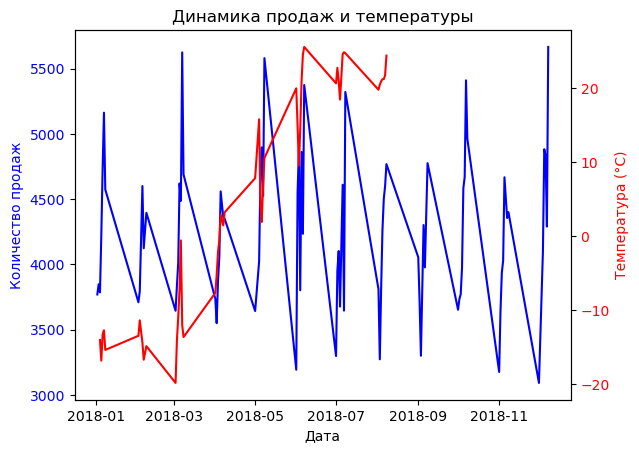

In [13]:
fig, ax1 = plt.subplots()

# Первая ось Y — продажи
ax1.plot(merged_df['Дата'], merged_df['Количество'], label='Количество продаж', color='blue')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Вторая ось Y — температура
ax2 = ax1.twinx()
ax2.plot(merged_df['Дата'], merged_df['T'], label='Температура (°C)', color='red')
ax2.set_ylabel('Температура (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Динамика продаж и температуры')
plt.show()


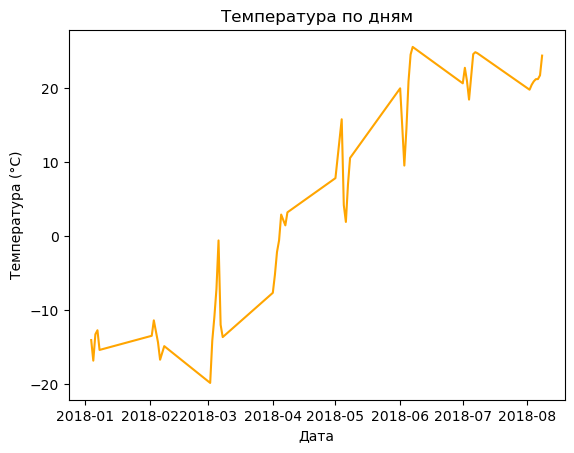

In [12]:
plt.plot(merged_df['Дата'], merged_df['T'], label='Температура (°C)', color='orange')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.title('Температура по дням')
plt.show()